**Problem Introduction & Motivation**

* **Purpose of Template**:
This notebook is a reusable template designed to guide the steps in a data mining and machine learning workflow. A well-structured outline allows for successful planning, organized code, and clarity in an machine learning project. By using this template, practitioners can ensure all necessary steps are considered before diving into code, saving both time and costs for an organization.

* **Dataset Example**: As an example, I am using the [winequality_white.csv] dataset. This dataset will serve as a practical example to outline the steps in this template.

* **Business Objective**: The goal of this project is to predict which white wines will be judged to be "high quality" before a judging takes place. Insights drawn from this prediction model can be valuable in improving operational efficiency by enhancing quality control, optimizing production processes, and improving customer satisfaction. 
    - In terms of quality control, if we can accurately classify wines as "high quality" or "low quality", it enables wineries and distributors to focus on maintaining a high standard of quality. Accurate classifications can help in identifying products that don't meet quality standards before they are shipped to customers.
    * In a production process, knowing which wines are likely to be classfied as "high quality" can help winemakers adjust production variables, such as acidity, sugar levels, and alchohol content, to consistently produce high-quality wines. This can also help reduce costs by minimizing the trial-and-error process in creating quality wines now that they know emphasizing which variables will likely contributes to the production of higher-quality wines. 
    * Predicting which white wines will be judged to be "high quality" before a judging takes place will also likely improve customer satisfaction. An accurate classficition means customers receive wines that meet quality expectations. This can enhance customer loyalty as customers are more likely to trust a brand that delivers consistent quality.

* **Questions to Address**:
    * Which features (e.g; chlorides, alchohol content, pH have the strongest influence on a wine being rated as "high quality"? Are there features we should prioritize or ignore?
    * What factors are most predictive of the target variable?
    * How can we use these factors to predict wine quality and make informed decisions and production and marketing?



**Relevant Background Information**
* **Exploratory Data Analysis (EDA)**: To understand initial data explorations such as correlations, summaries, distribution checks
    * Pandas Documentation (https://pandas.pydata.org/docs)
    * Seaborn For Visualization (https://seaborn.pydata.org/)
* **Wine Quality and Chemical Composition**:
    * Researching chemical properties like acidity and pH levels and how they influence wine quality

**Data Preperation (Checklist)**

1) Load data and verify data integrity
2) Data Inspection
3) Data Cleaning (check and remove duplicate values, standardize formats)
4) Handle Missing Values
5) Identify Outliers (choose to keep or remove)
6) Encode Categroical Variables

**Modeling Preparation (Checklist)**

1) Split the data into testing and training sets (80-20 or 70-30) to ensure fair evaluation
2) Data Balancing (if needed, class distribution check, calculate the proportion of each class to check for imbalance)
3) SMOTE (used to generate synthetic samples for the minority class)
4) Ensure correct file name of dataset is saved, rename if needed

In [11]:
!pip install pandas scikit-learn matplotlib seaborn

**Data Preparation**

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# Import the dataset
data = pd.read_csv('winequality-white.csv')

# Define X and y (assuming 'high_quality' is the target variable and all others are predictors)
X = data.drop(columns='high_quality')
y = data['high_quality']

# Handle missing values by filling with the median of each column
X.fillna(X.median(), inplace=True)

# Remove outliers using the IQR method
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_no_outliers = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_no_outliers = y[X_no_outliers.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

In [106]:
# Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

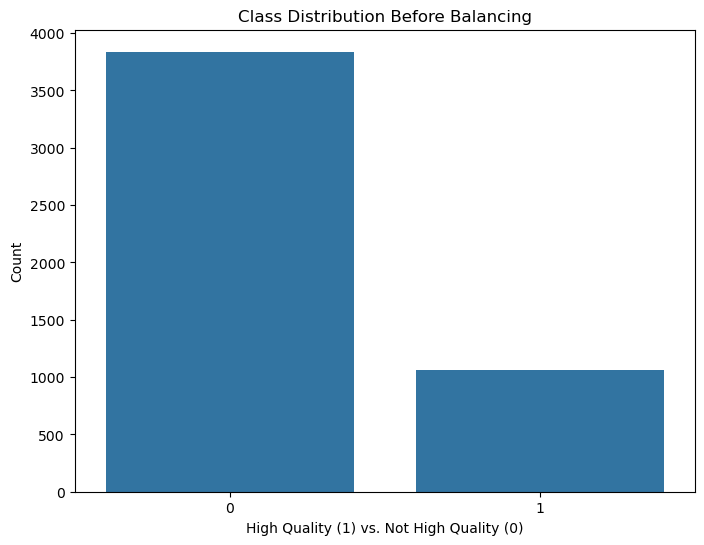

In [142]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution Before Balancing")
plt.xlabel("High Quality (1) vs. Not High Quality (0)")
plt.ylabel("Count")
plt.show()

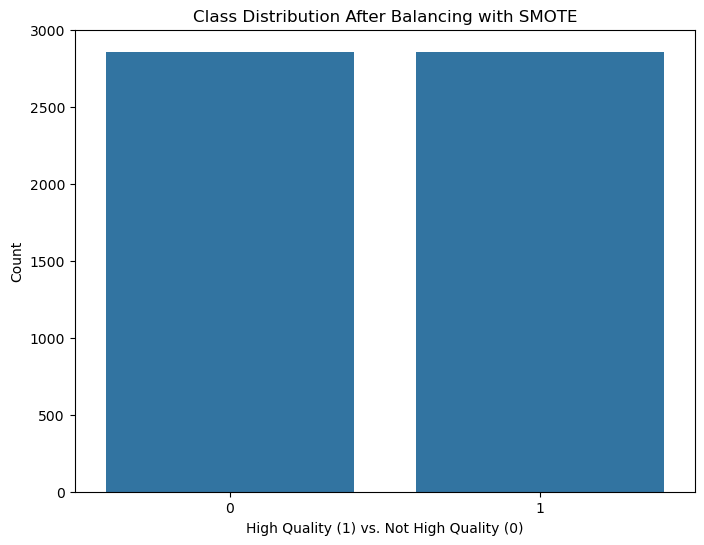

In [140]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution After Balancing with SMOTE")
plt.xlabel("High Quality (1) vs. Not High Quality (0)")
plt.ylabel("Count")
plt.show()

In [114]:
# Initialize and train the Logistic Regression model with increased max_iter
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the training set
y_train_pred = model.predict(X_train_balanced)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print both training and testing accuracy
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Optional: Check for overfitting or underfitting
if train_accuracy > test_accuracy + 0.1:
    print("Model might be overfitting to the training data.")
elif test_accuracy > train_accuracy + 0.1:
    print("Model might be underfitting to the training data.")
else:
    print("Model has a good generalization between training and testing sets.")

Training Accuracy: 0.72
Testing Accuracy: 0.69
Model has a good generalization between training and testing sets.


**Data Modeling**

Why Data Modeling?
Data modeling is a foundational step in building a robust machine learning pipeline. The insights gained from data modeling can help in predictive analytics, pattern recognition, and decision making.

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier  # Or any other model you're using
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [125]:
# Train a model for demonstration (Random Forest in this example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)

**Confusion Matrix**

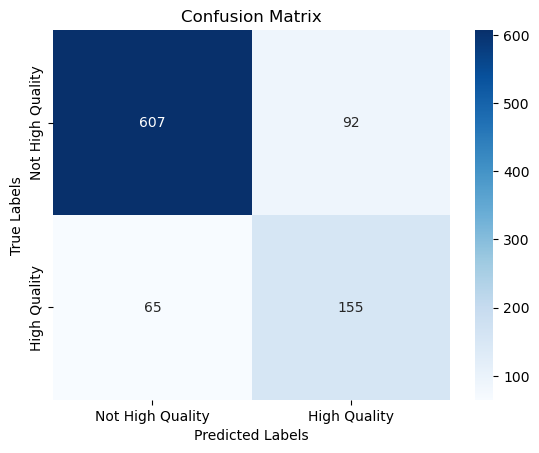

In [127]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Not High Quality', 'High Quality'], yticklabels=['Not High Quality', 'High Quality'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

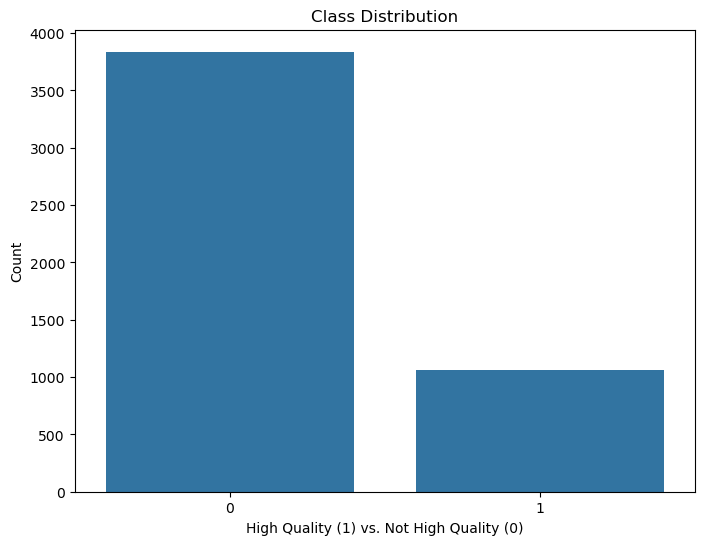

In [132]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("High Quality (1) vs. Not High Quality (0)")
plt.ylabel("Count")
plt.show()

<Figure size 1500x1000 with 0 Axes>

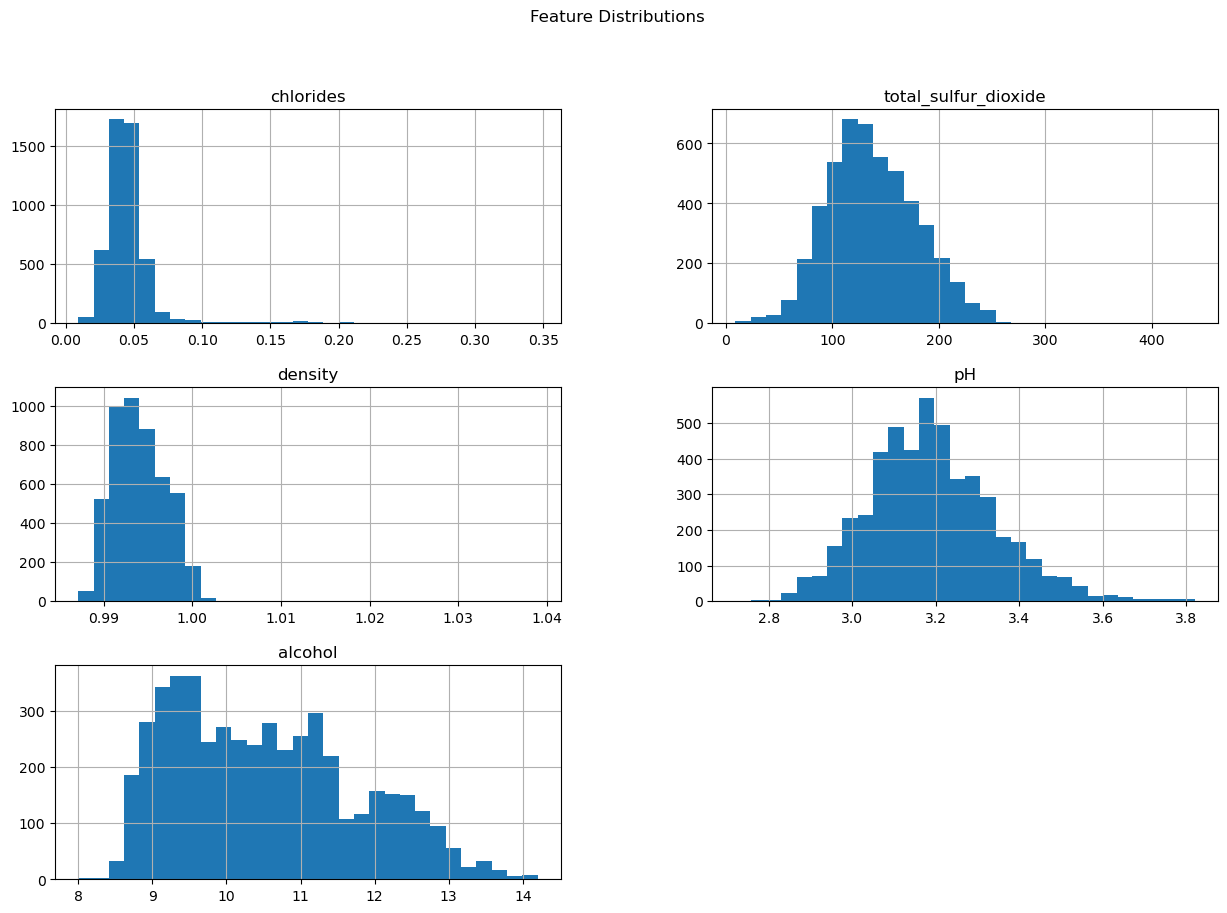

In [134]:
plt.figure(figsize=(15, 10))
X.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

This shows how each feature is distributed, helping us understand the spread and skewness of the data.

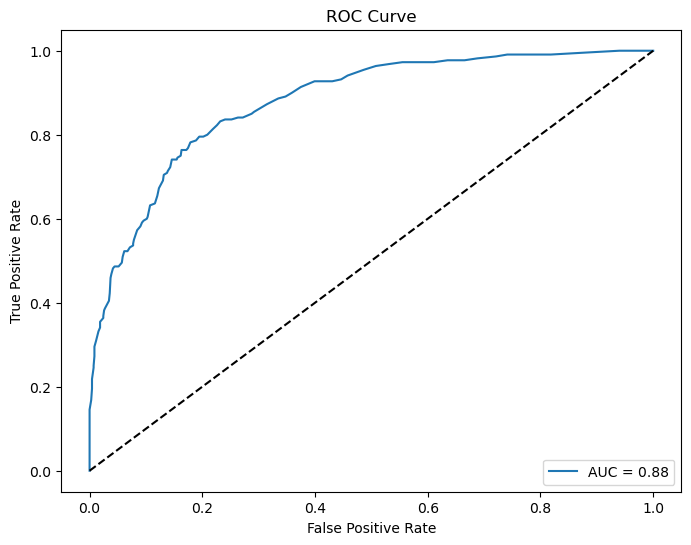

In [136]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

ROC curve helps in understanding the trade-off between sensitivity (recall) and specificity, allowing us to choose the optimal threshold for classification.

The Area Under the Curve (AUC) is a single scalar value that represents the overall performance of the model. An AUC close to 1 indicates a good model, while an AUC near 0.5 suggests random performance. For our mode, the AUC is 0.88 which indicates relatively good performance.

**Data Deployment**

In [150]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved successfully as model.pkl")


Model saved successfully as model.pkl


In [152]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [160]:
import pickle
import streamlit as st
import numpy as np
import pandas as pd

# Load the trained model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Set up the Streamlit app
st.title("Wine Quality Prediction")
st.write("This app predicts whether a wine is of high quality based on its features.")

# Collect user input for each feature
# Replace these with the actual feature names and ranges from your dataset
# Assume the model expects numeric inputs for each feature
# Example: fixed acidity, volatile acidity, citric acid, etc.

# Create input fields for the features
fixed_acidity = st.number_input("Fixed Acidity", min_value=0.0, max_value=15.0, value=7.4)
volatile_acidity = st.number_input("Volatile Acidity", min_value=0.0, max_value=2.0, value=0.7)
citric_acid = st.number_input("Citric Acid", min_value=0.0, max_value=1.0, value=0.0)
residual_sugar = st.number_input("Residual Sugar", min_value=0.0, max_value=20.0, value=1.9)
chlorides = st.number_input("Chlorides", min_value=0.0, max_value=0.1, value=0.076)
free_sulfur_dioxide = st.number_input("Free Sulfur Dioxide", min_value=0.0, max_value=100.0, value=11.0)
total_sulfur_dioxide = st.number_input("Total Sulfur Dioxide", min_value=0.0, max_value=200.0, value=34.0)
density = st.number_input("Density", min_value=0.990, max_value=1.005, value=0.9978)
pH = st.number_input("pH", min_value=2.0, max_value=4.0, value=3.51)
sulphates = st.number_input("Sulphates", min_value=0.0, max_value=2.0, value=0.56)
alcohol = st.number_input("Alcohol", min_value=0.0, max_value=15.0, value=9.4)

# Collect all inputs into a feature array
features = np.array([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                      chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,
                      pH, sulphates, alcohol]])

# Button to make a prediction
if st.button("Predict Quality"):
    prediction = model.predict(features)
    quality = "High Quality" if prediction[0] == 1 else "Not High Quality"
    st.write(f"The model predicts that this wine is: **{quality}**")


In [ ]:
streamlit run app.py

**Model Serialization** - saves the trained decision tree model using a serialization format like joblib or pickle for future use.

**Deployment Preparation** - sets up necessary dependencies and environment configuration for model deployment

**Real Time Inference** - implment a function for real time predictions using new data inputs

**Model Monitoring** - establish a monitoring framework to track model performance post-deployment, recognizing drifts or retraining needs

**Documentation** - document the deployment setup and provide guidelines for users to run and maintain the model in production